# PyPI qqman GWAS plots  

Example using Alzheimer's Disease GWAS data from OpenGWAS Project

https://gwas.mrcieu.ac.uk/datasets/ieu-a-298/

#### Imports & setup

In [1]:
import os
import pandas as pd
from qqman import qqman
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
## input files
dir_gwas = '../data/gwas_plink'

plink_assoc = 'ieu-a-298.assoc'
plink_logistic = 'ieu-a-298.assoc.logistic'

## output dir
dir_plot = '../data/gwas_plink/plots_pypi_qqman'

#### setup variables

In [3]:
gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

<br>  

## plot PLINK --assoc output

In [4]:
!head {gwas_file_assoc}

CHR SNP BP A1 F_A F_U A2 CHISQ P OR
1 1_2256288_rs76805690 2256288 A 0.0 0.0 C 0.0 0.02598005104323265 0.0389
1 1_2261983_rs75379543 2261983 A 0.0 0.0 C 0.0 0.010780030758042881 0.0427
1 1_2263666_rs75273719 2263666 A 0.0 0.0 G 0.0 0.003361011512001321 0.0502
1 1_2263888_rs903904 2263888 T 0.0 0.0 C 0.0 0.014869966838387313 0.0413
1 1_2265070_rs80107522 2265070 C 0.0 0.0 T 0.0 0.00770406609416186 0.0446
1 1_4867850_rs12410445 4867850 G 0.0 0.0 T 0.0 0.8791000403738986 -0.005
1 1_6046264_rs12142270 6046264 A 0.0 0.0 G 0.0 0.9726999644432942 -0.0014
1 1_6520312_rs3138158 6520312 T 0.0 0.0 C 0.0 0.11860008492224751 -0.0522
1 1_12401868_rs28551666 12401868 C 0.0 0.0 A 0.0 0.00044420147876595995 0.0627


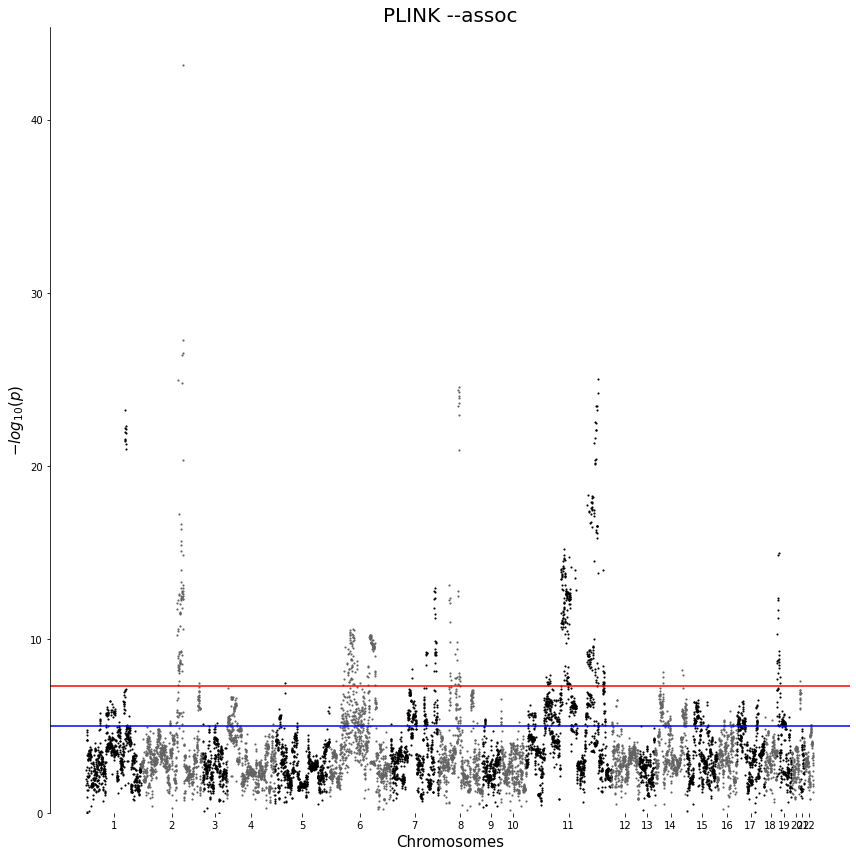

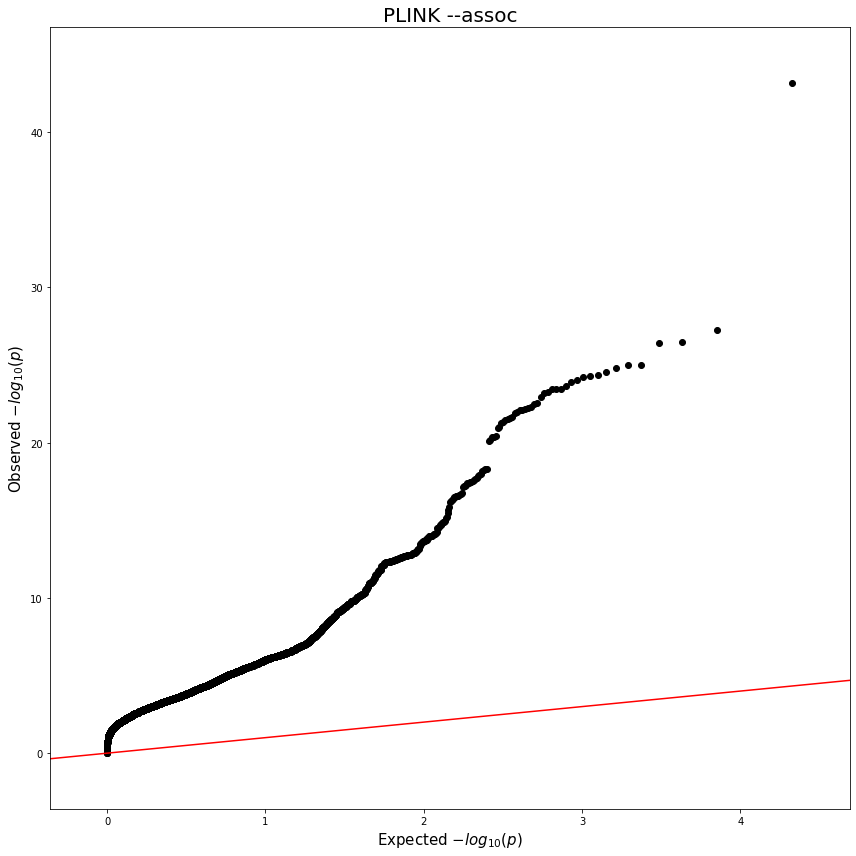

In [5]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=True, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=True, 
                title='PLINK --assoc')


#### Generate --assoc plots as subplot example

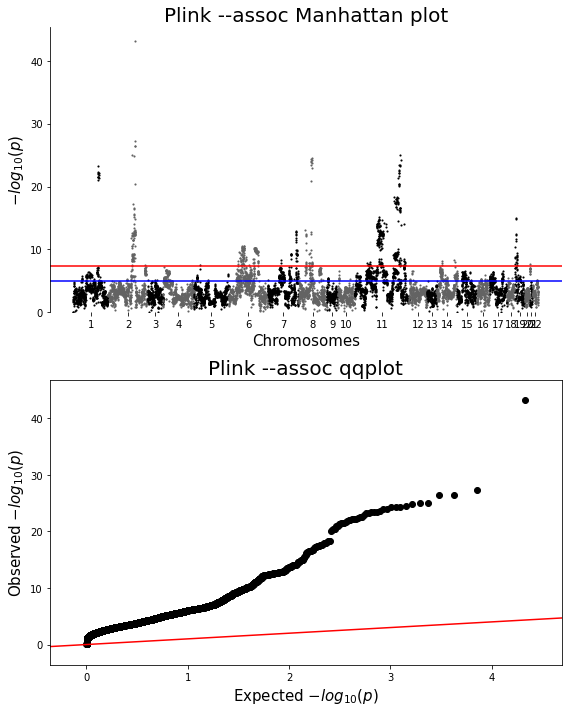

In [6]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_assoc, ax=axes[0], title="Plink --assoc Manhattan plot")
qqman.qqplot(gwas_file_assoc, ax=axes[1], title="Plink --assoc qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [7]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=False, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=False, 
                title='PLINK --assoc')

<br>  

## plot PLINK --logistic output

In [8]:
!head {gwas_file_logistic}

CHR SNP BP A1 TEST NMISS OR SE STAT P
1 1_2256288_rs76805690 2256288 A ADD 74046 0.0389 0.0175 0.0 0.02598005104323265
1 1_2261983_rs75379543 2261983 A ADD 74046 0.0427 0.0167 0.0 0.010780030758042881
1 1_2263666_rs75273719 2263666 A ADD 74046 0.0502 0.0171 0.0 0.003361011512001321
1 1_2263888_rs903904 2263888 T ADD 74046 0.0413 0.0169 0.0 0.014869966838387313
1 1_2265070_rs80107522 2265070 C ADD 74046 0.0446 0.0168 0.0 0.00770406609416186
1 1_4867850_rs12410445 4867850 G ADD 74046 -0.005 0.0332 0.0 0.8791000403738986
1 1_6046264_rs12142270 6046264 A ADD 74046 -0.0014 0.0416 0.0 0.9726999644432942
1 1_6520312_rs3138158 6520312 T ADD 74046 -0.0522 0.0335 0.0 0.11860008492224751
1 1_12401868_rs28551666 12401868 C ADD 74046 0.0627 0.0179 0.0 0.00044420147876595995


<br>

## <font color='blue'> *_NOTE: need to extract P-values from --logistic output --> pass to qqplot function_* </font>

reason for this is due to bug in the pypi qqman package:   

* error when parsing file 'TEST' column when tries to cast 'ADD' string to float  
* see error message below for details  



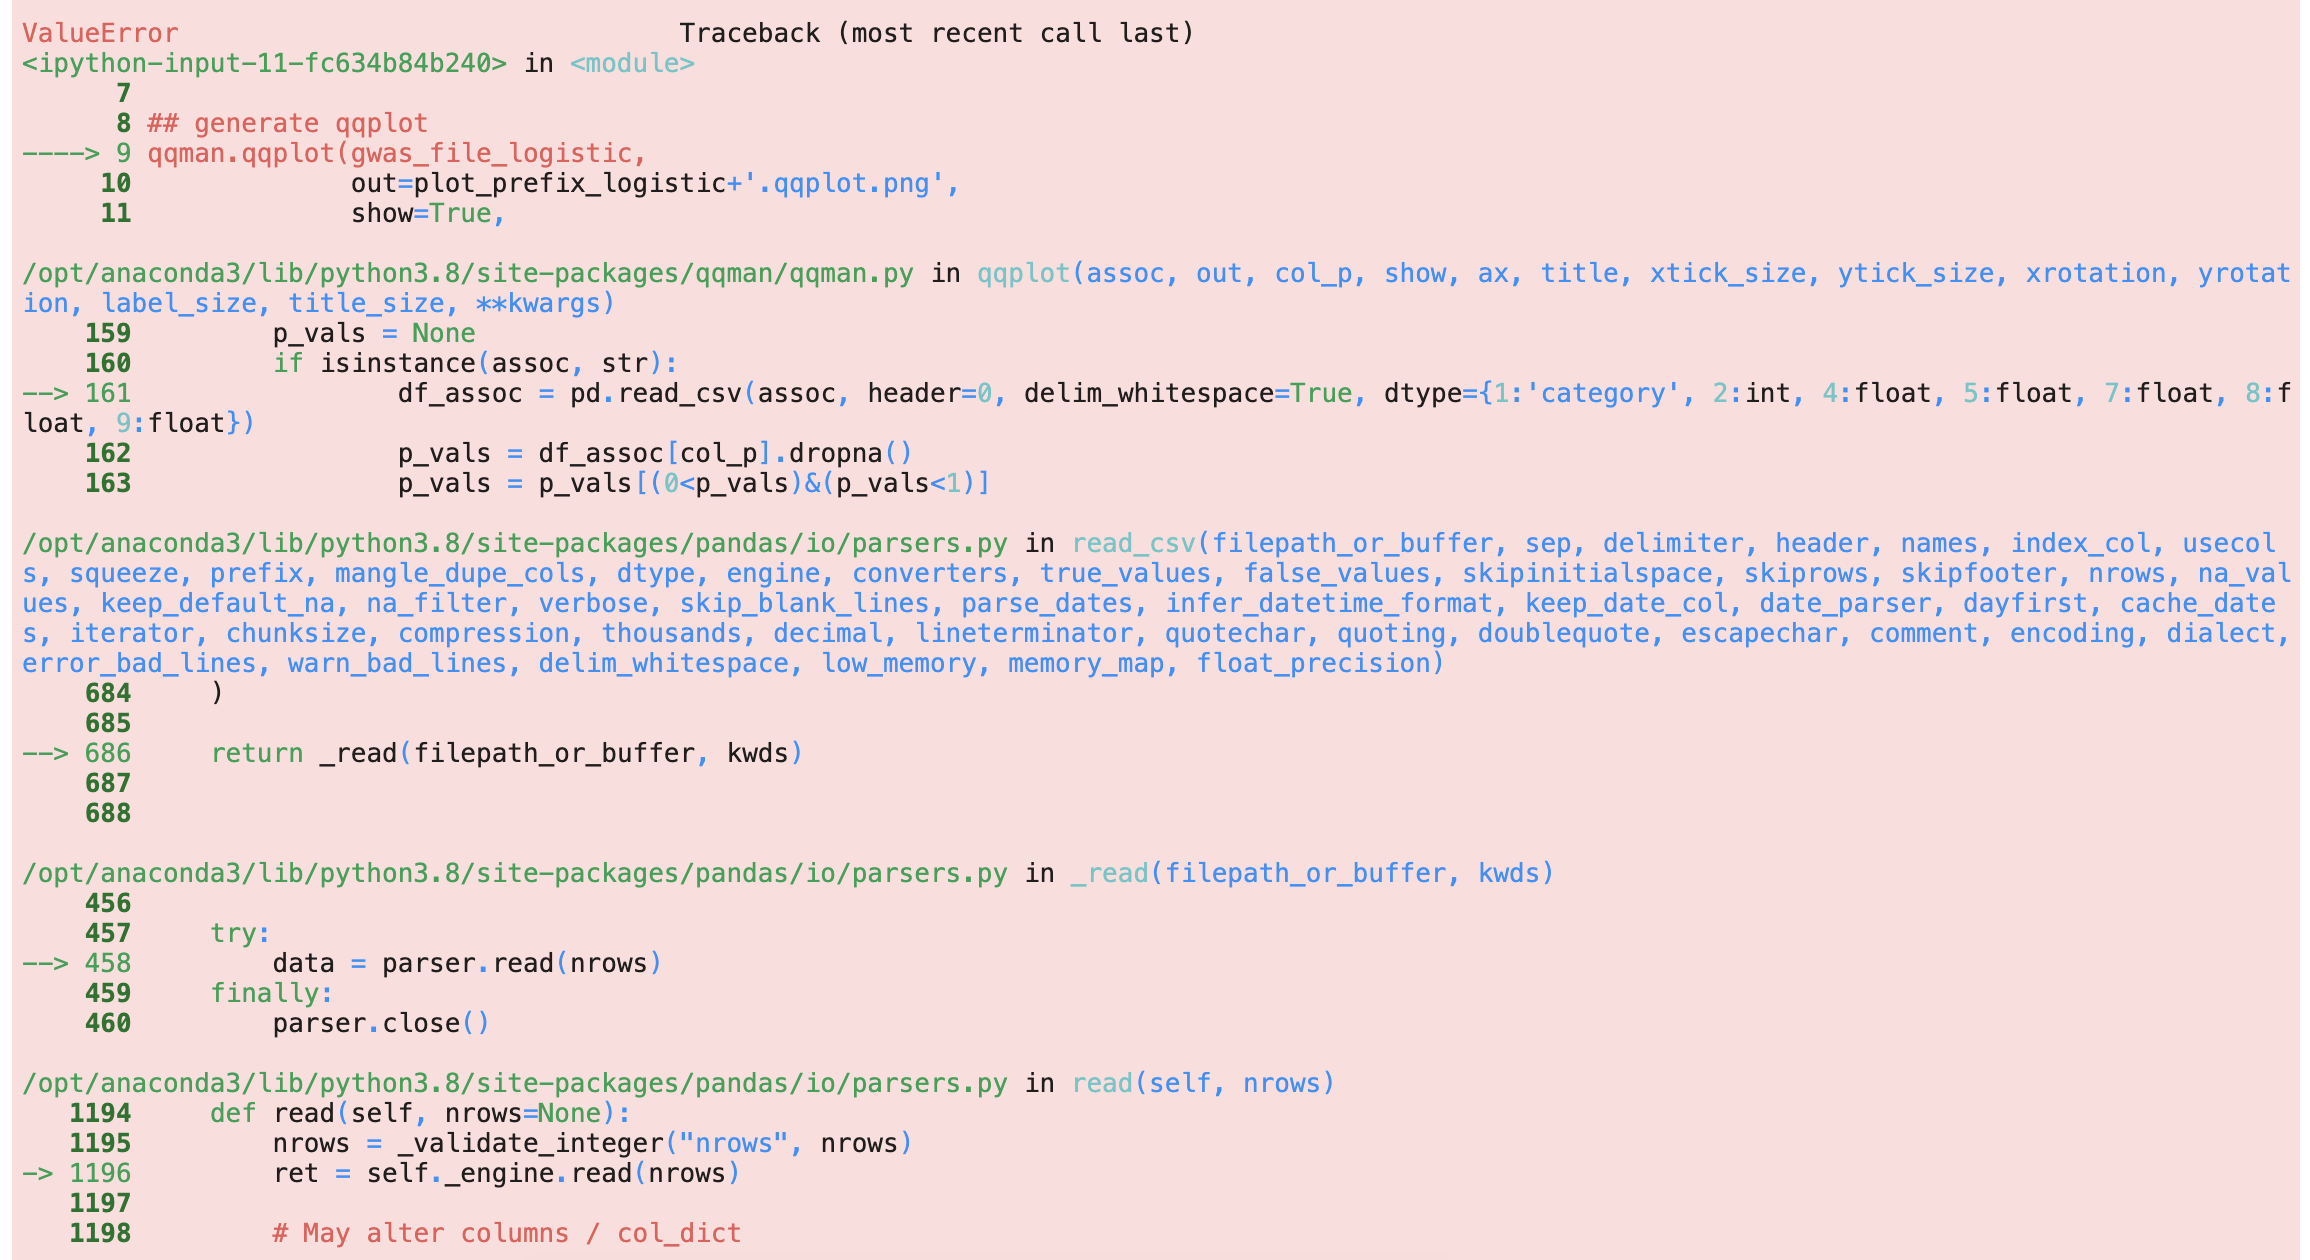  
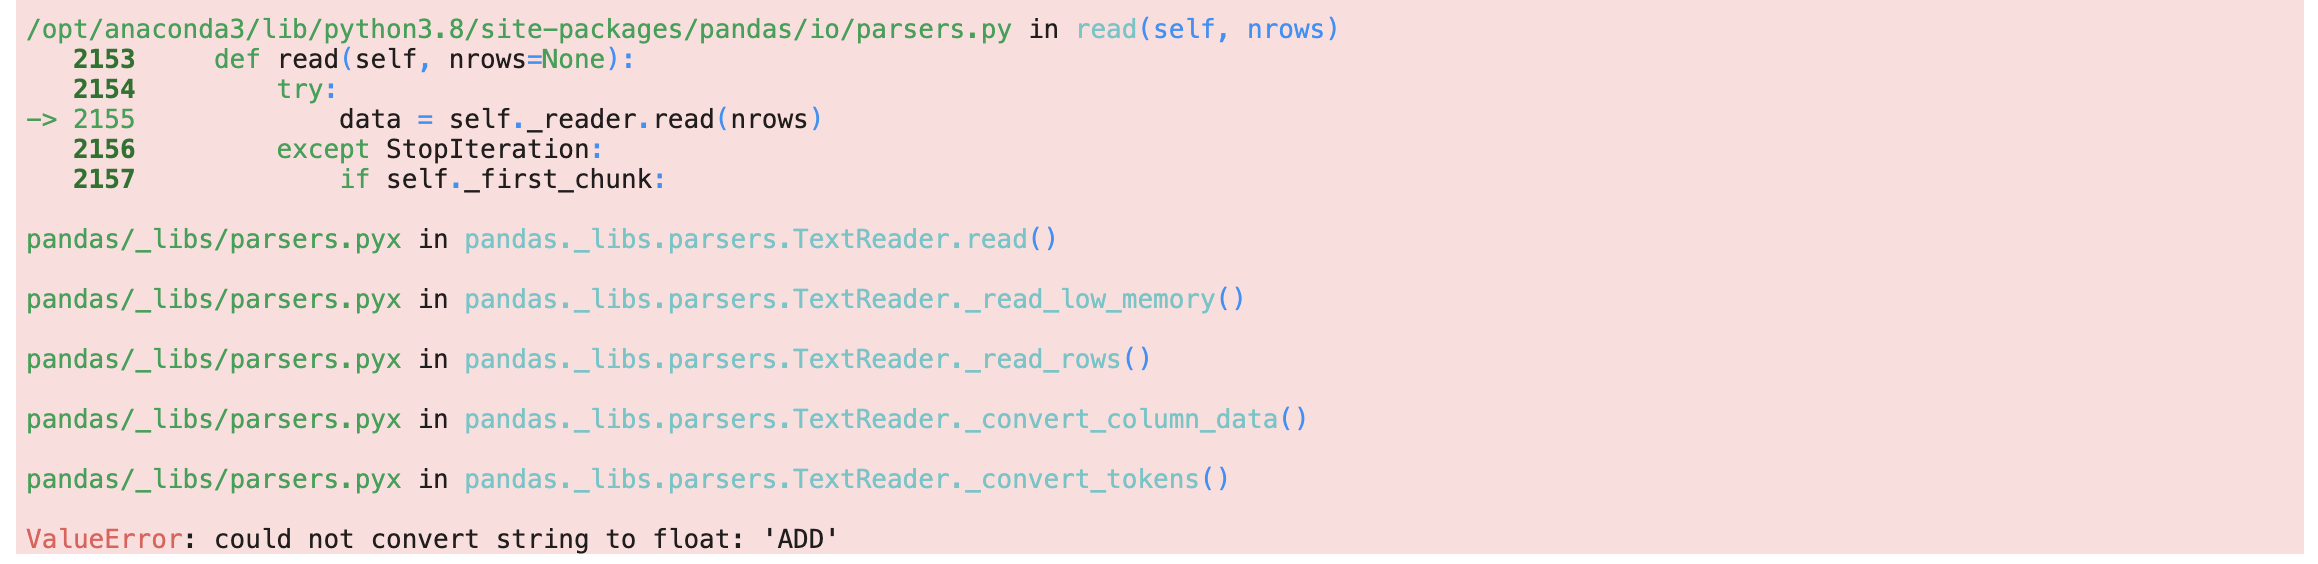

#### read in .assoc.logistic file --> Pandas DF & extract 'P' value column to list & delete DF

In [9]:
df = pd.read_csv(gwas_file_logistic, header=0, delim_whitespace=True)

df.head()

pval_logistic = list(df['P'])
del df

CHR                   SNP       BP A1 TEST  NMISS      OR      SE  STAT  \
0    1  1_2256288_rs76805690  2256288  A  ADD  74046  0.0389  0.0175   0.0   
1    1  1_2261983_rs75379543  2261983  A  ADD  74046  0.0427  0.0167   0.0   
2    1  1_2263666_rs75273719  2263666  A  ADD  74046  0.0502  0.0171   0.0   
3    1    1_2263888_rs903904  2263888  T  ADD  74046  0.0413  0.0169   0.0   
4    1  1_2265070_rs80107522  2265070  C  ADD  74046  0.0446  0.0168   0.0   

          P  
0  0.025980  
1  0.010780  
2  0.003361  
3  0.014870  
4  0.007704

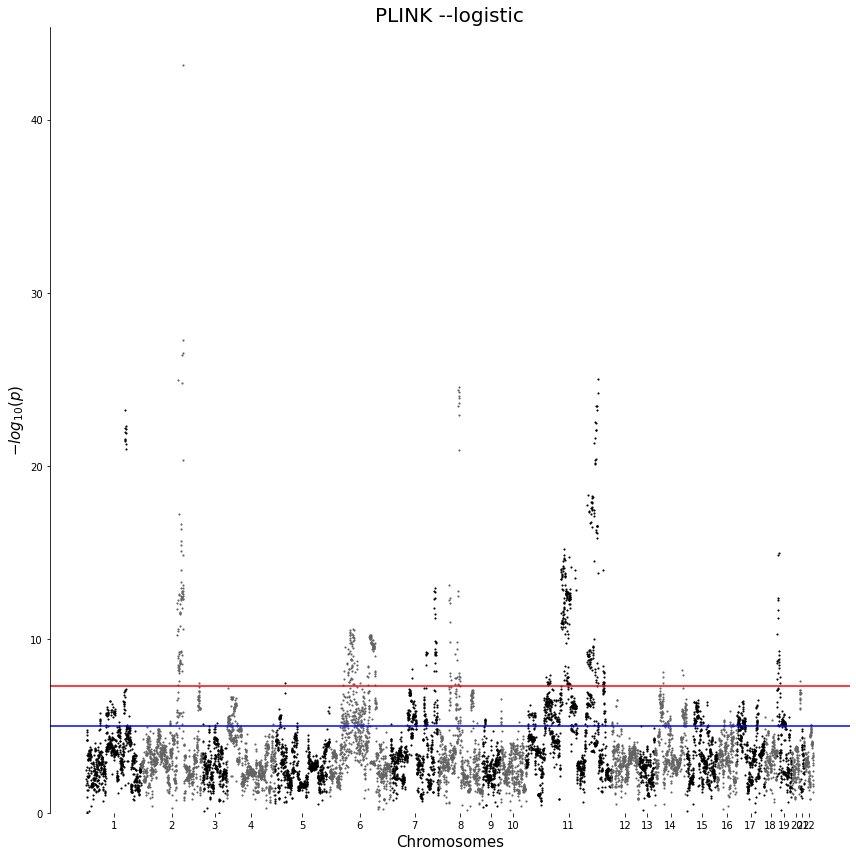

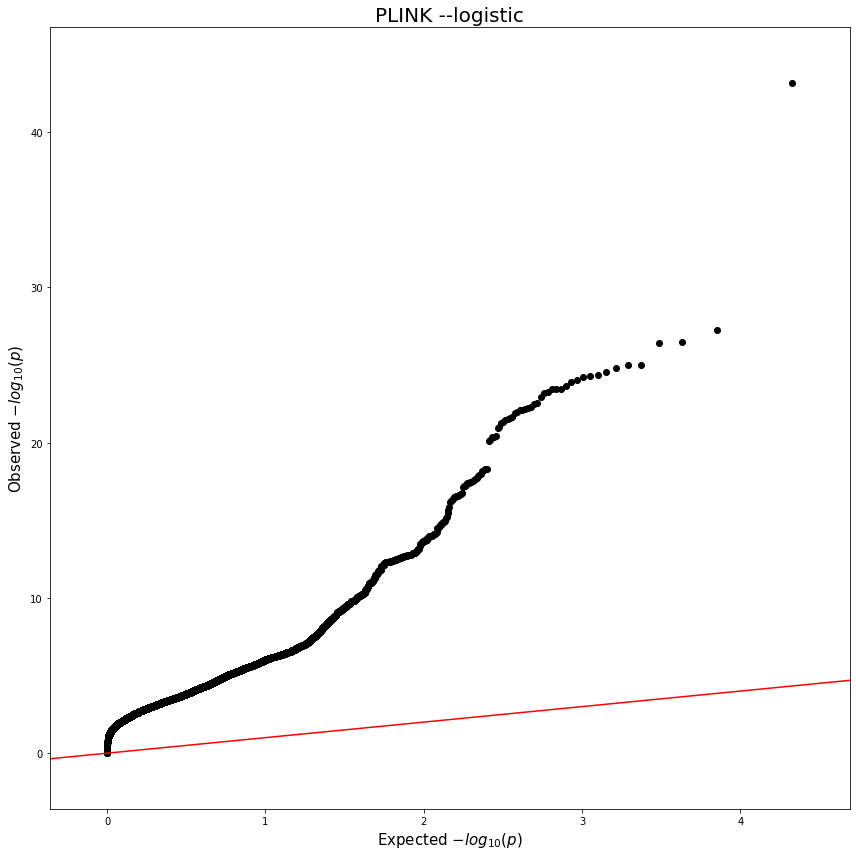

In [10]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=True, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=True, 
                title='PLINK --logistic')


#### Generate --logistic plots as subplot example

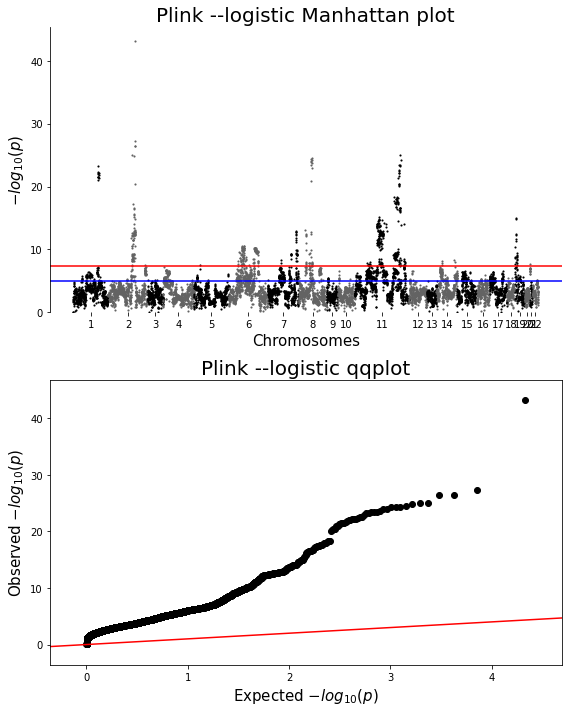

In [11]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, ax=axes[0], title="Plink --logistic Manhattan plot")
qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [12]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=False, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=False, 
                title='PLINK --logistic')

<br>  

## Example of how to format Manhattan plot

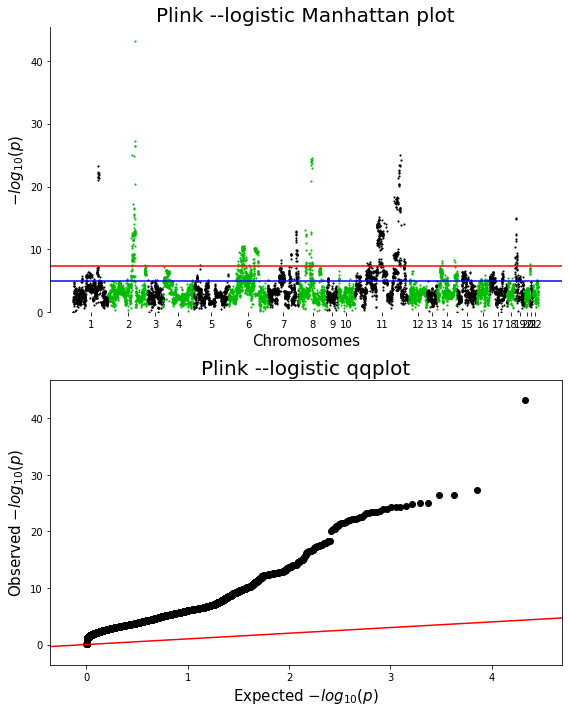

In [13]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, 
                ax=axes[0], 
                title="Plink --logistic Manhattan plot", 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()